<a href="https://colab.research.google.com/github/Francofus/IMSE441/blob/main/Lab_9_FrancoFustagno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

#statistic 
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [3]:
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/Oxygen%20purity.csv"
df = pd.read_csv(url)
df.head(2)

,obs,hydrocarbon,purity
0,1,0.99,90.01
1,2,1.02,89.05


In [4]:
x = df[['hydrocarbon']]
y = df['purity']
x

,hydrocarbon
0,0.99
1,1.02
2,1.15
3,1.29
4,1.46
5,1.36
6,0.87
7,1.23
8,1.55
9,1.40


In [5]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [6]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [14.94747973]
y-intercept  74.28331424039479


 **y = 74.28331424039479 + 14.94747973*x**
 


In [7]:
r_sq = model.score(x, y)
r_sq

0.8774357051715553

In [8]:
y_pred = model.predict(x)
y_pred

array([89.08131918, 89.52974357, 91.47291593, 93.56556309, 96.10663465,
       94.61188668, 87.28762161, 92.66871431, 97.45190783, 95.20978587,
       92.07081512, 91.47291593, 88.93184438, 89.38026877, 90.87501674,
       92.22028992, 93.1171387 , 94.01398749, 95.65821026, 88.48341999])

In [10]:
print("mean square error: ", mean_squared_error(y,y_pred))
print("variance or r-squared: ", explained_variance_score(y, y_pred))

mean square error:  1.0624908437610157
variance or r-squared:  0.8774357051715552


**Method 2**

In [11]:
import statsmodels.api as sm
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 purity   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     128.9
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           1.23e-09
Time:                        04:42:24   Log-Likelihood:                -28.985
No. Observations:                  20   AIC:                             61.97
Df Residuals:                      18   BIC:                             63.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          74.2833      1.593     46.617      

In [12]:
print(model1.ssr)

21.249816875220308


In [13]:
residual = y - y_pred
residual

0     0.928681
1    -0.479744
2    -0.042916
3     0.174437
4     0.623365
5    -0.161887
6     0.302378
7    -0.898714
8     1.968092
9    -1.559786
10    1.469185
11    1.047084
12    1.628156
13    0.159731
14   -1.025017
15   -1.830290
16    0.132861
17   -0.603987
18   -0.678210
19   -1.153420
Name: purity, dtype: float64

In [14]:
sse = residual*residual
sse.sum()

21.24981687522031

In [ ]:
%pip install pingouin
import pingouin as pg

Text(0.5, 1.0, 'OUR DATA')

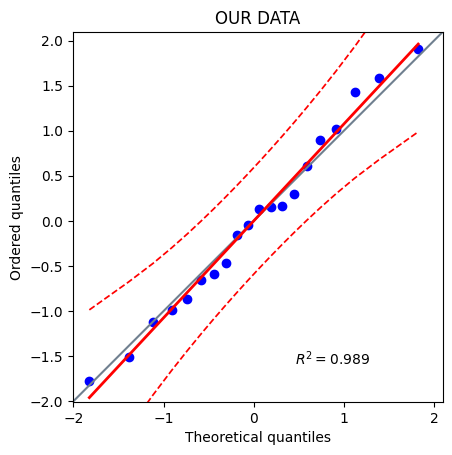

In [17]:
plt.show()            
pg.qqplot(residual).set_title('OUR DATA')